<a href="https://colab.research.google.com/github/sidhu2690/IDC-410/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Function Description: Generate Data Set with Dependent and Independent Variables

The function generates a dataset consisting of m + 1 dimensional data, where n is the size of the dataset, m is the number of continuous independent variables, and Y is the dependent variable defined as:

yi = xiβ + e

Where:

e is a Gaussian distribution with mean 0 and standard deviation σ, representing the unexplained variation in Y.
β is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship between X and Y.
For all i in the range [1, n], xi0 = 1.
Function Parameters:

σ: The spread of noise in the output variable.
n: The size of the dataset.
m: The number of independent variables.
Output from the Function:

X: An n × m numpy array of independent variable values (with a 1 in the first column).
Y: The n × 1 numpy array of output values.
β: The random coefficients used to generate Y from X.

###Generate data


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(sigma, n, m):
    beta = np.random.normal(size=(m + 1, 1))
    X = np.hstack([np.ones((n, 1)), np.random.normal(size=(n, m))])
    e = np.random.normal(scale=sigma, size=(n, 1))
    Y = X.dot(beta) + e
    return X, Y, beta

###Linear regression

In [2]:
def linear_regression_gradient_descent(X, Y, k, tau, learning_rate):
    beta = np.random.normal(size=(X.shape[1], 1))
    prev_cost = np.inf
    for epoch in range(k):
        Y_pred = X.dot(beta)
        error = Y_pred - Y
        cost = np.mean(error ** 2) / 2
        if np.abs(cost - prev_cost) < tau:
            break
        gradient = X.T.dot(error)
        beta -= learning_rate * gradient / len(Y)
        prev_cost = cost
    return beta, cost


###Training

In [38]:
sigma = 0.4
n = 100
m = 1
k = 1000
tau = 1e-6
learning_rate = 0.01
X, Y, true_beta = generate_dataset(sigma, n, m)
beta_gd, final_cost = linear_regression_gradient_descent(X, Y, k, tau, learning_rate)

###Scattered plot

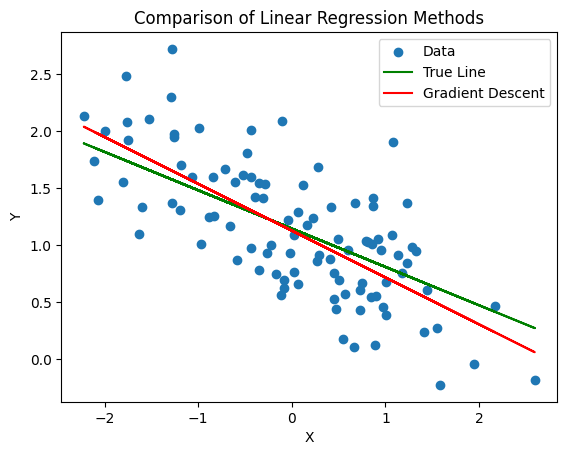

In [39]:
plt.scatter(X[:,1], Y, label='Data')
plt.plot(X[:,1], X.dot(true_beta), color='green', label='True Line')
plt.plot(X[:,1], X.dot(beta_gd), color='red', label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Linear Regression Methods')
plt.legend()
plt.show()

###Part 3
Investigate how differen values of n and σ impact the ability for your linear regression
function to learn the coefficients, β, used to generate the output vector Y .

In [40]:
from sklearn.metrics import mean_squared_error
sigmas = np.arange(0,1,0.1)
ns = np.arange(50,550,50)

mse_values = np.zeros((len(sigmas), len(ns)))
for i, sigma in enumerate(sigmas):
    for j, n in enumerate(ns):
        X, Y, true_beta = generate_dataset(sigma, n, m)
        beta_gd, _ = linear_regression_gradient_descent(X, Y, k, tau, learning_rate)
        mse_values[i, j] = mean_squared_error(true_beta, beta_gd)

print("Mse values between learned and true coefficients:")
print("\n             ", end="")
for n in ns:
    print(f"n = {n:<7}", end="")
print()
for i, sigma in enumerate(sigmas):
    print(f"σ = {sigma:<7.2f}:", end="")
    for j, n in enumerate(ns):
        print(f" {mse_values[i, j]:<7.4f}", end="")
    print()


Mse values between learned and true coefficients:

             n = 50     n = 100    n = 150    n = 200    n = 250    n = 300    n = 350    n = 400    n = 450    n = 500    
σ = 0.00   : 0.0001  0.0001  0.0001  0.0000  0.0001  0.0000  0.0001  0.0001  0.0001  0.0001 
σ = 0.10   : 0.0006  0.0001  0.0001  0.0001  0.0002  0.0001  0.0001  0.0001  0.0001  0.0001 
σ = 0.20   : 0.0010  0.0002  0.0002  0.0001  0.0005  0.0001  0.0003  0.0000  0.0001  0.0001 
σ = 0.30   : 0.0013  0.0013  0.0006  0.0009  0.0005  0.0001  0.0002  0.0003  0.0004  0.0005 
σ = 0.40   : 0.0007  0.0021  0.0004  0.0012  0.0011  0.0009  0.0001  0.0002  0.0008  0.0002 
σ = 0.50   : 0.0001  0.0036  0.0017  0.0001  0.0016  0.0016  0.0005  0.0007  0.0007  0.0003 
σ = 0.60   : 0.0034  0.0094  0.0006  0.0022  0.0004  0.0003  0.0004  0.0001  0.0009  0.0005 
σ = 0.70   : 0.0155  0.0025  0.0006  0.0007  0.0021  0.0029  0.0013  0.0001  0.0026  0.0005 
σ = 0.80   : 0.0015  0.0063  0.0024  0.0013  0.0012  0.0001  0.0008  0.0002  0.00


#### Heatmap for visualizing the difference between learned and true coefficients

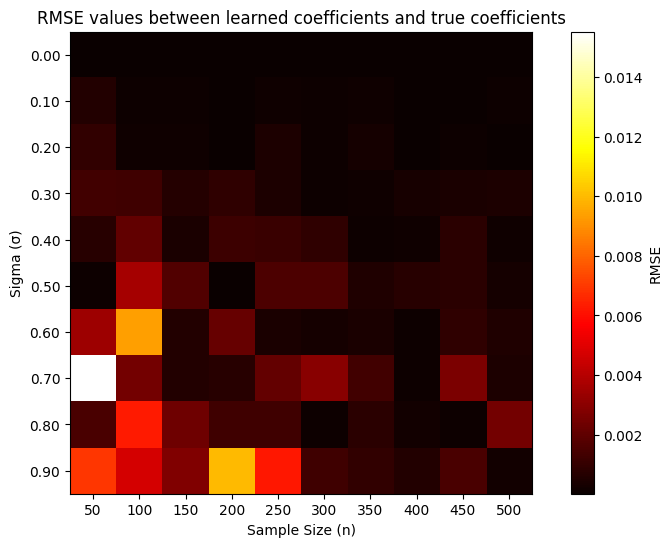

In [41]:
plt.figure(figsize=(10, 6))
plt.imshow(mse_values, cmap='hot', interpolation='nearest')
plt.colorbar(label='RMSE')
plt.title('RMSE values between learned coefficients and true coefficients')
plt.xlabel('Sample Size (n)')
plt.ylabel('Sigma (σ)')
plt.xticks(np.arange(len(ns)), ns)
plt.yticks(np.arange(len(sigmas)), [f'{sigma:.2f}' for sigma in sigmas])
plt.show()